# 3d galaxy (--volume-prior) volume prior visualization
This is some code to check that the 3d volumetric galaxy prior looks sane. To use it, run gb_mcmc with --galaxy-prior and --verbose. gb_mcmc will output 3dgalaxyprior.dat to its working directory.
This code imports that file and makes some histograms of the prior itself.

In [1]:
import numpy as np
a = np.loadtxt("/home/mtauraso/src/ldasoft/rundir19/3dgalaxyprior.dat", 
               [('x', 'double'), ('y', 'double'), ('z', 'double'), ('logp', 'double')])

print(a['z'])
print(len(a))
print(a['logp'])

[-15.92 -15.76 -15.6  ...  15.6   15.76  15.92]
8000000
[-14.97866 -14.97866 -14.97866 ... -14.97866 -14.97866 -14.97866]


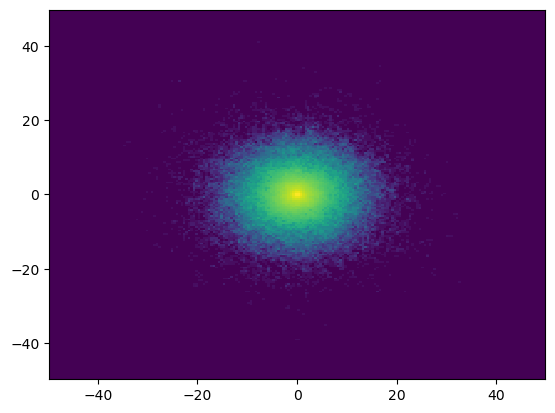

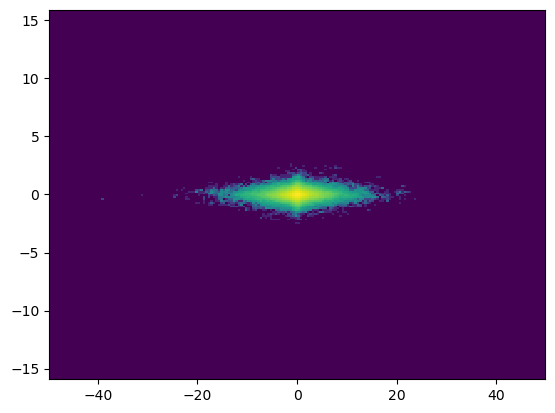

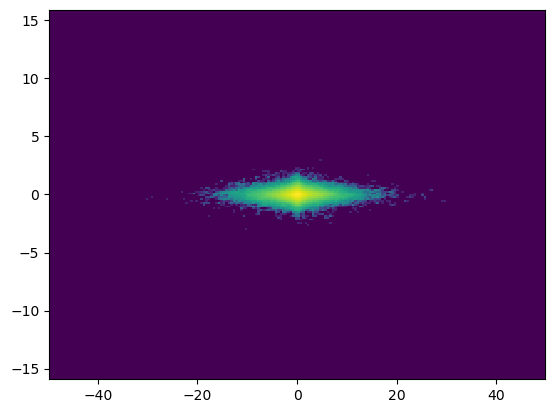

In [3]:
import matplotlib.pyplot as plt


def galaxyslice(a, plane, min, max):
    mask = np.logical_or(np.greater(a[plane], max), np.less(a[plane], min))
    planes = ["x", "y", "z"]
    planes.remove(plane)

    ax = np.ma.masked_array(a[planes[0]], mask=mask).compressed()
    ay = np.ma.masked_array(a[planes[1]], mask=mask).compressed()
    ap = np.ma.masked_array(a['logp'], mask=mask).compressed()
    _,_,_,_ = plt.hist2d(ax, ay, weights=ap, bins=(200,200))
    plt.show()


galaxyslice(a,"z", -1, 1)
galaxyslice(a,"x", -1, 1)
galaxyslice(a,"y", -1, 1)
